<a href="https://colab.research.google.com/github/narayandabu/MyPython-Ai-ml-Projects/blob/master/titanic_survival_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the below cell to download the csv and file into your colab/jupyter notebook and start working with it. You will be needing this for completing the task.

In [ ]:
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2023-11-02 18:43:30--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2023-11-02 18:43:30 (4.57 MB/s) - ‘titanic.csv.3’ saved [61194/61194]



## Task: Machine Learning Model for Titanic Survival Prediction

### Introduction:
In this task, you will work on the Titanic dataset, a famous dataset in the field of machine learning. The goal is to build a machine learning model that predicts whether a passenger on the Titanic survived or not. The dataset contains various features, and you will need to perform several key tasks in the machine learning pipeline.

### Instructions:

1. **Data Preprocessing:**
    - Load the Titanic dataset.
    - Handle missing values in the dataset.
    - Encode categorical features (e.g., one-hot encoding or label encoding).
    - Split the data into training and testing sets.

2. **Exploratory Data Analysis (EDA):**
    - Perform exploratory data analysis to understand the dataset.
    - Visualize the data to gain insights into passenger demographics and their survival rates.
    - Identify any interesting patterns or correlations between features and survival.

3. **Outlier Detection and Removal:**
    - Detect and deal with outliers in the dataset.
    - Explain the approach you used for outlier detection and removal.

4. **Data Extraction:**
    - Create any new features or transformations that you believe might be useful for improving the model's performance.
    - Justify the choice of these new features or transformations.

5. **Model Selection:**
    - Choose a machine learning algorithm for classification. Suggest at least three common classification algorithms (e.g., Logistic Regression, Random Forest, Support Vector Machine).
    - Explain your rationale for selecting the chosen algorithms.

6. **Model Building and Hyperparameter Tuning:**
    - Implement the selected machine learning algorithms and train them on the training data.
    - Perform hyperparameter tuning for each algorithm to optimize their performance.
    - Clearly specify the hyperparameters you tuned and the methodology used.

7. **Model Evaluation:**
    - Evaluate the performance of each model using accuracy as the primary metric.
    - Compare the models and choose the best-performing model for the final predictions.
    - Report the accuracy score for the chosen model on the testing data.

8. **Conclusion:**
    - Summarize your findings and the key steps in the machine learning pipeline.
    - Reflect on any challenges you encountered and how you addressed them.

### Submission:
Submit your code, along with a report explaining the steps you took, the reasoning behind your choices, and the accuracy score achieved on the test dataset.

Good luck, and may your machine learning model effectively predict Titanic passenger survival!


#Libraries for data analysis and cleaning

In [ ]:
# your code starts here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

#**User-Defined Functions for data visualization**

In [ ]:
def rm_outliers(df,clm):
  Q1 = df[clm].quantile(0.25)
  Q3 = df[clm].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[clm] >= lower_bound) & (df[clm] <= upper_bound)]

def kde_vs_survived(df, vs):
  survived = df[df['Survived']==1][vs]
  not_survived = df[df['Survived']==0][vs]
  sns.kdeplot(survived,label='Survived')
  sns.kdeplot(not_survived,label='Not_Survived')
  plt.legend()
  plt.show()

### Data Visualizations and Insights

##Overview of the Data
-> It shows that the total number of data points should be 891 but for example we can see in case of **Age** only 714 are present Hence Data cleaning needs to start from here itself.


-> Also we can see that the passenger Id nor the Name as well as the ticket and cabin data Will not contribute significantly to the survival of a person. Hence we can Directly Remove Them.

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###**Data Removal and Transforming**

In [ ]:
df.pop('PassengerId')
df.pop('Name')
df.pop('Ticket')
df.pop('Cabin')
gender = {'male':0,
          'female':1}
df['Sex'].replace(gender,inplace=True)

###**Age**
**Conclusions**:- A Particular Range of People Died in Titanic and a particular range have Survived the most hence age could be a key factor in the survival rate


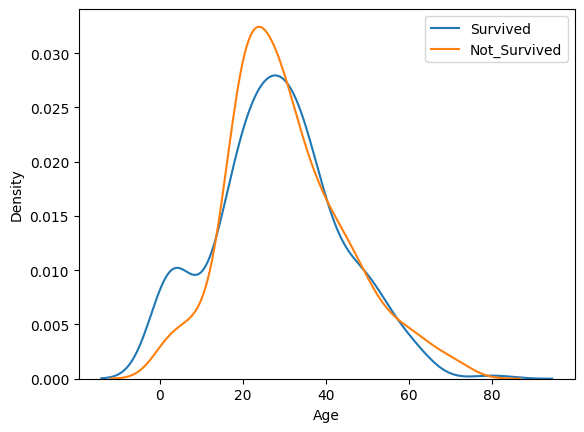

In [ ]:
kde_vs_survived(df,'Age')

###**Pclass**
**Conclusions:-** Here we can see the that many people from a particular class survived while many from another have not survived hence this could be an important factor as well.


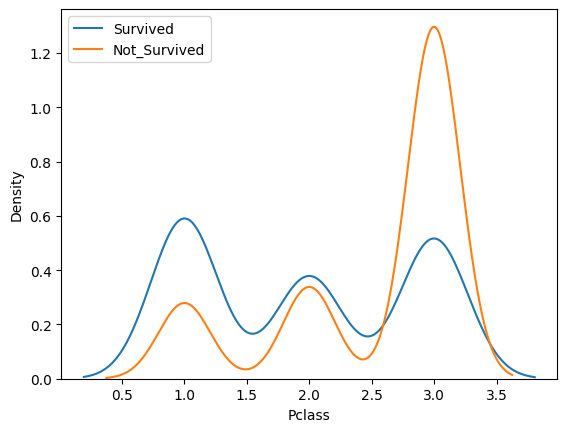

In [ ]:
kde_vs_survived(df,'Pclass')

###**Parch and SibSp**
Conclusions:- Both The graphs look quite similar and their uses are quite similar so combining them together to form a new *family* column could we usefull

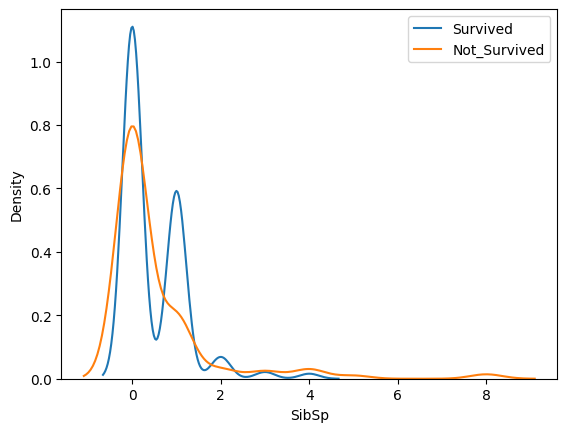

In [ ]:
kde_vs_survived(df,'SibSp')

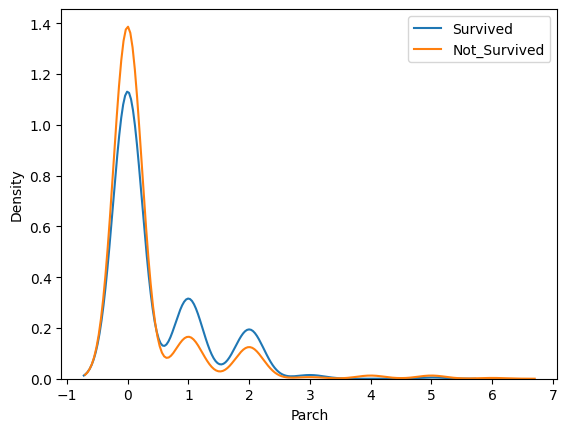

In [ ]:
kde_vs_survived(df,'Parch')

###**Adding and removing Features**

*   Here We can see the parch and sibsp are preety much the similar to each other one describes the number of parents while the other the siblings.

*  Also From KDE Plot we can see they have quite Similar graphs hence adding them together could be Usefull for us.

In [ ]:
df['F_members'] = df['Parch']+df['SibSp']
df.pop('SibSp')
df.pop('Parch')
print("Added")

Added


###**Fare**
*Conclusions*

*   This was the Most complex Parameter to handle as we have remove outliers as well take into account how dependent it is to the Survival Rate.
*   Turns Out It was a indeed a Big Factor As we can see from the KDE Plot Many people with low fare prices didnot survive while people who paid higher had a higher survival rate.



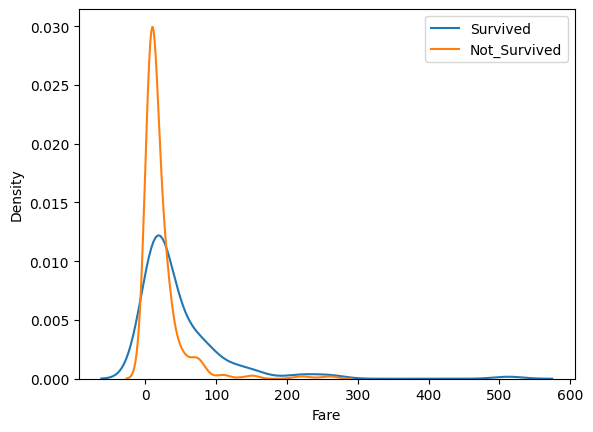

In [ ]:
kde_vs_survived(df,'Fare')

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df = rm_outliers(df,'Fare')
df = rm_outliers(df,'Age')

#**Special function**


*   *After all this if we ever want to train ml models on the same type of dataset then we can use this function.*
*   *It is nothing but just the entire Summary of the data cleaning process, all the descisions we took for cleaning the data compiled under one function.*


In [ ]:
def data_transform(df):
  df.pop('PassengerId')
  df.pop('Name')
  df.pop('Ticket')
  df.pop('Cabin')
  gender = {'male':0,
            'female':1}
  df['Sex'].replace(gender,inplace=True)
  df['F_members'] = df['Parch']+df['SibSp']
  df.pop('SibSp')
  df.pop('Parch')
  median_age = df['Age'].median()
  df['Age'].fillna(median_age, inplace=True)
  df = rm_outliers(df,'Fare')
  df = rm_outliers(df,'Age')
  X=np.array([df['Age'],df['Fare'],df['F_members'],df['Pclass'],df['Sex']])
  X=X.T
  y=df['Survived']
  return X,y

#**Libraries For Models and there Corresponding Utilities**

In [ ]:
# Models with their Utilites
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

###**Data Splitting**
-> So now we need to take in Account the models to use and splitting the data as well.

In [ ]:
X=np.array([df['Age'],df['Fare'],df['F_members'],df['Pclass'],df['Sex']])
X=X.T
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model-Selection**
-> Before we select a Model We need to see which type of problem is this and from Analyzing we can simply say its a classification Problem and that to a binary classification problem.

-> Hence We need to Check several Models for the optimal performance.There are many classificaion models.I have Used only some the well known and prominent ones.Here Only the raw models are used not with any tuning.


In [ ]:
models={
    'LogisticReg':[LogisticRegression(),0],
    'Knearest':[KNeighborsClassifier(),0],
    'RandomForest':[RandomForestClassifier(),0],
    'SVC':[SVC(),0],
}
model1 = models['Knearest'][0]
model2 = models['RandomForest'][0]
model3 = models['LogisticReg'][0]
model4 = models['SVC'][0]
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
print("Training Complete")

Training Complete


#**Predictions**

In [ ]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

#**Scores**
#*Conclusions:-*
We can see that the best performer here is the RandomForest Classifier > LogisticReg > Knearest > SVC.

In [ ]:
score1=accuracy_score(y_test, pred1) # Knearest
score2=accuracy_score(y_test, pred2) # RandomForest
score3=accuracy_score(y_test, pred3) # LogisticReg
score4=accuracy_score(y_test, pred4) # SVC
score1*100,score2*100,score3*100,score4*100

(76.76056338028168, 85.2112676056338, 82.3943661971831, 71.12676056338029)

#**Hyper-Parameter Tuning.**

*  Now Here we try to adjust certain hyper-parameters in the models we used before.
*  In order to get the best out of the models we will perform RandomizedSearchCV to find the best hyper-parammeters for each model and then Conclude the best model.



#*Libraries required for Hyper-Parameter Tuning*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#*User Defined Function for hyperparameter-tuning.*

In [ ]:
def best_model_pred(model,param_grid):
  radom_srch_svm = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=101, cv=5, random_state=42)
  radom_srch_svm.fit(X_train,y_train)
  best_params = radom_srch_svm.best_params_
  best_model = radom_srch_svm.best_estimator_
  best_model_score = best_model.score(X_test, y_test)
  return best_model,best_model_score

#*Specifying which combinations of Parameters to try for.*

In [ ]:
param_grid_knear={
    'weights':['uniform','distance'],
}
param_grid_rndfrst={
    'n_estimators': randint(10, 200),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}
param_grid_logreg={
    'C':[1,2,3,4,5],
    'penalty':['l2']
}
param_grid_svm={
    'C':[1,2,3,4,5],
    'kernel':['linear'],
    'gamma':['auto'],
}

##*Results after hyperparameter tuning*

*   We can see some models perform really well after tuning them manually while some donot perform that well.
*   Although we were not able to get any immensly better results after tuning but we can see slight improvements these can be further improved if we have more data.



In [ ]:
model2_cpy=model2 # Copy of the Random Forest we trained for further enhancements
knearst,kn_score=best_model_pred(model1,param_grid_knear)
rndforest,rf_score=best_model_pred(model2,param_grid_rndfrst)
logreg,lr_score=best_model_pred(model3,param_grid_logreg)
svc,svc_score=best_model_pred(model4,param_grid_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=101. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=101. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=101. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print('Knearest --------------->',kn_score)
print('Rndfrst  --------------->',rf_score)
print('logreq   --------------->',lr_score)
print('SVC      --------------->',svc_score)
models['Knearest']=knearst,kn_score
models['RandomForest']=rndforest,score2
models['LogisticReg']=logreg,lr_score
models['SVC']=svc,svc_score

Knearest ---------------> 0.795774647887324
Rndfrst  ---------------> 0.8450704225352113
logreq   ---------------> 0.823943661971831
SVC      ---------------> 0.7746478873239436


#*Alternative Way of making a better RandomForest Classifier*
-> Randomforest classifier which is a combination of many different decision trees where the final prediction is generated by aggregating the predictions from each individual and independent decision tree.

-> So we what we can do is remove certain bad performing descision trees which will inturn improve the overall model.

In [ ]:
model_accs= []
for idx, tree in enumerate(model2_cpy.estimators_):
    score = tree.score(X_test, y_test)
    model_accs.append([idx, score])
model_accs = np.array(model_accs)
model_accs[:5]

array([[0.        , 0.81690141],
       [1.        , 0.83802817],
       [2.        , 0.8028169 ],
       [3.        , 0.84507042],
       [4.        , 0.83802817]])

*So these are the indices of the best performing descision trees in the RF-classifier*

In [ ]:
sorted_indices = np.argsort(model_accs[:, 1])[::-1]
model_ids = model_accs[sorted_indices][:,0].astype(int)
model_ids[:10]

array([52, 48, 74, 24,  3, 27, 10, 30, 47, 91])

In [ ]:
model2_cpy.estimators_ = np.array(model2_cpy.estimators_)[model_ids].tolist()

*Here what we did was compiled only those descision trees which have a better accuracy.*

In [ ]:
total_models = len(model2_cpy.estimators_)
best_model = model2
for i in range(2, total_models):
    best_model.estimators_ = model2_cpy.estimators_[:i]
models['modified_rndforest']=best_model,best_model.score(X_test, y_test)

#**Pipeline**

#*Libraries for data preprocessing and Pipeline*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

*Finding the best model*

In this step we find out the *bestmodel* as per there accuracy scores

In [ ]:
models = list(models.values())
maxacc=models[0][1]
best_model=models[0][0]
for [model,x] in models:
  if maxacc<x:
    maxacc=x
    best_model=model
best_model,maxacc

(RandomForestClassifier(max_features='log2', min_samples_split=16,
                        n_estimators=43),
 0.852112676056338)

**Creating the pipeline:-**

*   Here we have finally created a pipeline with the best model from our analysis.
*   Here also we have included some preprocessing although we could have avoided that but it gives a little boost for the trained model.



In [ ]:
pipeline = Pipeline([
                     ('missing_values', SimpleImputer(strategy='mean')),
                     ('feature_scaling', StandardScaler()),
                     ('model',best_model)
                     ])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
accuracy_score(y_test,predictions)

0.8591549295774648

#**Exporting The Pipeline:-**

*   Altough this was not mentioned in the steps but it was very essential to export our models/pipelines so that we donot run them again and again.
*   Here i have used joblib, while pickle being an option but it was not advised to store models in pickle format as they are sensetive to cracks hence joblib.



In [ ]:
import joblib
filename = 'pipeline.joblib'
joblib.dump(pipeline, filename)
print('pipeline exported successfully')

pipeline exported successfully


#**Challenges Faced And Learnings From Them.**

1. **Problem:**  *While Doing the data analysis the biggest challenge was identifying which features of the data affect the label in which way. To Overcome it seaborn and matplotlib was really helpfull which showed the graphs where visualzing the data made a difference in data analysis.*

* **Learning:** learning Here was to just visualize, visualize and visualize the data as much as possible inorder to find the relationships and draw accurate conclusions.

2. **Problem:** *Second Part of the data analysis that was difficult was reducing the number of features so that the model becomes efficient.To counter this we have merged certain columns and many were completely removed as there presence didn't affect the labels.*

* **Learning:** *Here the learning was looking similarties between features and again visualizing the data/ using common sense to reduce the features(Like removing the slno. from a dataset,etc.).But biggest learning was **"Not every data in the dataset is usefull"**.*

3. *Now After spilting and training the model the next challenge was to find a more efficient model. To do so we did hyper-Parameter tuning/Fine-tuning using RandomizedSearchcv.Also we found a new approach of optimizing and improving Random-Forest Classifier which was again very helpfull and turned out to perfom the best among all.*

* **Learning:** *Here the learning was to use google for info on the several ways to fine tuning and methods of optimizing certain algorithms based on data Used*







#**Thank You Very Much for this Entire learning process that you guys gave and your patience to read all these 🙏**